In [1]:
import matplotlib.pyplot as plt
from spencer2017 import *
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth'    : 0.4,
                     'ytick.major.width' : 0.4,
                     'ytick.minor.width' : 0.4,
                     'xtick.major.width' : 0.4,
                     'xtick.minor.width' : 0.4,
                     'xtick.major.size'  : 2,
                     'xtick.minor.size'  : 1,
                     'ytick.major.size'  : 2,
                     'ytick.minor.size'  : 1,
                     'xtick.minor.visible' : 'True',
                     'ytick.minor.visible' : 'True',
                     'xtick.labelsize': 5, 
                     'ytick.labelsize': 5,
                     'axes.labelsize' : 5,
                     'font.family': 'Serif',
                     'figure.figsize': (10/3, 3.3),
                     'figure.dpi' : 200,
                     'ytick.right': 'True',
                     'xtick.top'  : 'True',
                     'ytick.direction': 'in',
                     'xtick.direction': 'in',
                     'axes.spines.top': 'True',
                     'axes.grid': 'False',
                     'grid.linestyle': '--',
                     'grid.linewidth': 0.25
                    })
import seaborn as sns
sns.set_palette('deep')

In [2]:
m_1 = jnp.array([0.8]*9)
logP = jnp.log10(jnp.array([100*365.25]*9))
q = jnp.array([0.1,0.5,1.0] + [0.5]*6)
e = jnp.array([0.5]*3 + [0.0,0.5,0.9] + [0.5]*3)
w = jnp.array([jnp.pi/2]*6 + [0, jnp.pi/4, jnp.pi/2])
i = jnp.array([jnp.pi/2]*9)
v = theta = jnp.array([None]*9)
M = jnp.array([0]*9)


/var/folders/fm/vtt1lgnd7_911ghhst5bfhxr0000gn/T/ipykernel_92669/3509049184.py:7: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  v = theta = jnp.array([None]*9)


In [3]:
state = OrbitParams(m_1,q,e,logP,i,w,v,M,theta)
state

OrbitParams(m_1=Array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], dtype=float32), q=Array([0.1, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32), e=Array([0.5, 0.5, 0.5, 0. , 0.5, 0.9, 0.5, 0.5, 0.5], dtype=float32), logP=Array([4.56259, 4.56259, 4.56259, 4.56259, 4.56259, 4.56259, 4.56259,
       4.56259, 4.56259], dtype=float32), i=Array([1.5707964, 1.5707964, 1.5707964, 1.5707964, 1.5707964, 1.5707964,
       1.5707964, 1.5707964, 1.5707964], dtype=float32), omega=Array([1.5707964, 1.5707964, 1.5707964, 1.5707964, 1.5707964, 1.5707964,
       0.       , 0.7853982, 1.5707964], dtype=float32), v=Array([nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32), M=Array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), theta=Array([nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32))

In [ ]:
model = TestModel()

In [5]:
state = model.init(state)

In [6]:
state_list = []
body_fn = jax.jit(model.update)
# body_fn = model.update
dt = jnp.array(365.25/10)
vs = []
for _ in range(110*10):
    state = body_fn(state, dt)
    vs.append(state.v)

In [7]:
vs = jnp.array(vs)
vs = vs.T

In [8]:
vs[0].shape

(1100,)

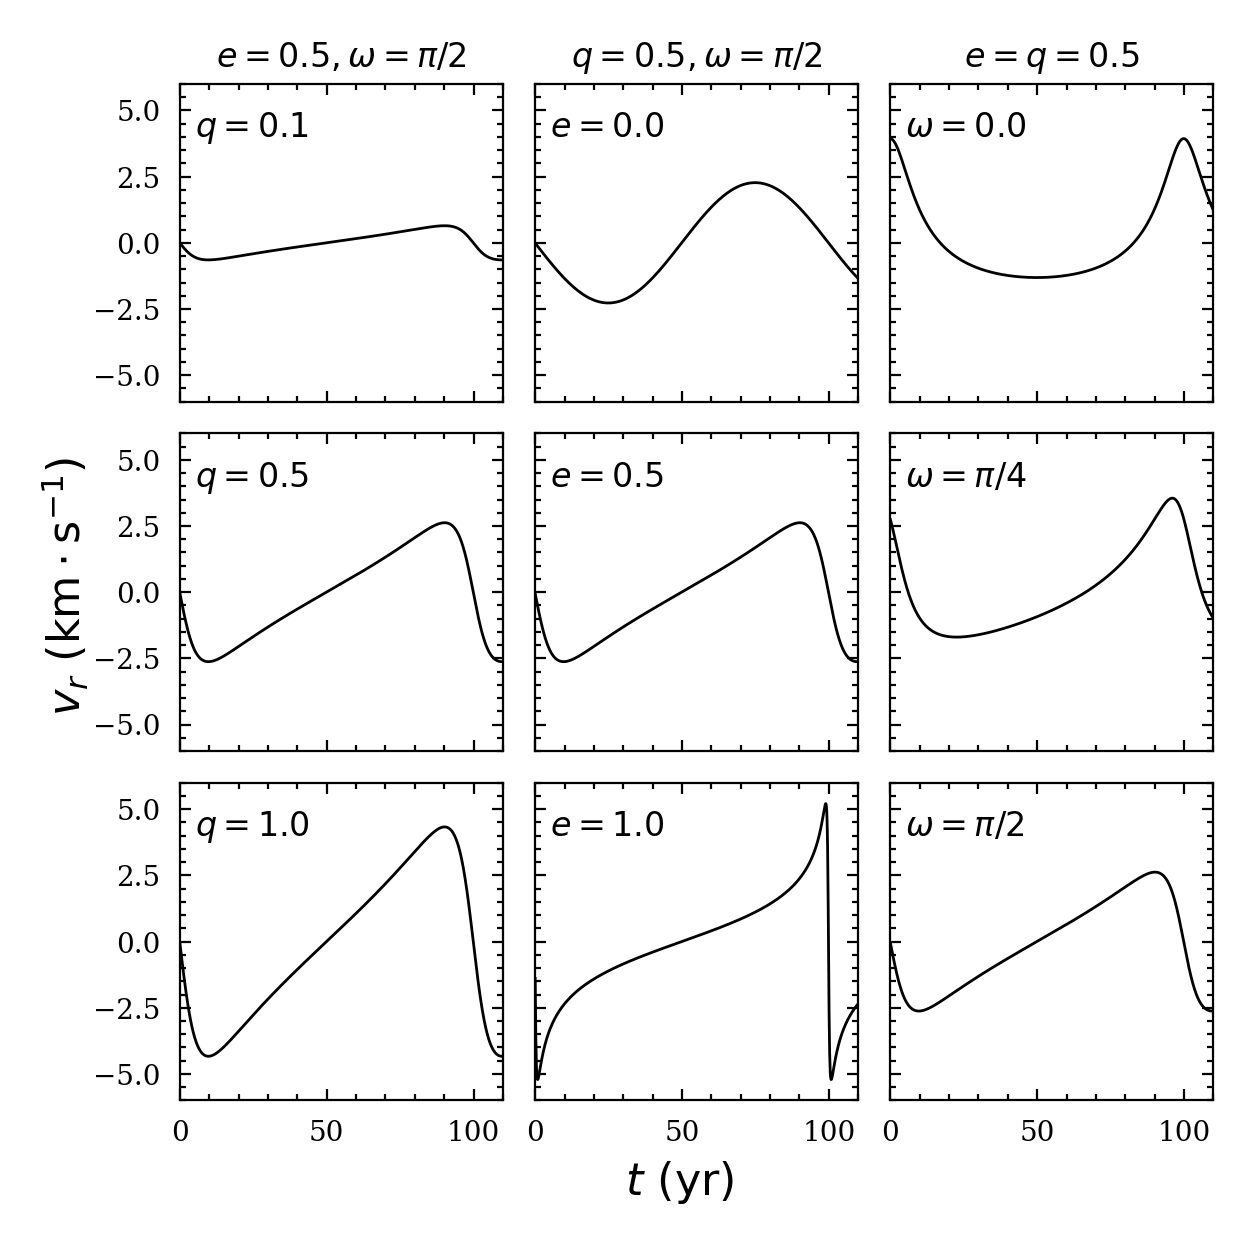

In [9]:
fig, ax = plt.subplots(3, 3, sharey=True, sharex=True)
ts = [_/10 for _ in range(1100)]
# fig.gca().set_xticklabels([])
fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.ylim(-6,6)
plt.xlim(0,110)
ax[0][0].plot(ts, vs[0], lw=0.5, c='k')
ax[0][0].text(x=5,y=4,s='$q=0.1$', fontsize=6)
ax[1][0].plot(ts, vs[1], lw=0.5, c='k')
ax[1][0].text(x=5,y=4,s='$q=0.5$', fontsize=6)
ax[2][0].plot(ts, vs[2], lw=0.5, c='k')
ax[2][0].text(x=5,y=4,s='$q=1.0$', fontsize=6)
ax[0][1].plot(ts,vs[3], lw=0.5, c='k')
ax[0][1].text(x=5,y=4,s='$e=0.0$', fontsize=6)
ax[1][1].plot(ts,vs[4], lw=0.5, c='k')
ax[1][1].text(x=5,y=4,s='$e=0.5$', fontsize=6)
ax[2][1].plot(ts,vs[5], lw=0.5, c='k')
ax[2][1].text(x=5,y=4,s='$e=1.0$', fontsize=6)
ax[0][2].plot(ts,vs[6], lw=0.5, c='k')
ax[0][2].text(x=5,y=4,s=rf'$\omega=0.0$', fontsize=6)
ax[1][2].plot(ts,vs[7], lw=0.5, c='k')
ax[1][2].text(x=5,y=4,s=rf'$\omega=\pi/4$', fontsize=6)
ax[2][2].plot(ts,vs[8], lw=0.5, c='k')
ax[2][2].text(x=5,y=4,s=rf'$\omega=\pi/2$', fontsize=6)
ax[0,0].set_title(rf'$e=0.5,\omega=\pi/2$', fontsize=6, y=0.95)
ax[0,1].set_title(rf'$q=0.5,\omega=\pi/2$', fontsize=6, y=0.95)
ax[0,2].set_title(rf'$e=q=0.5$', fontsize=6, y=0.95)
fig.supylabel(r'$v_r~(\mathrm{km}\cdot\mathrm{s}^{-1})$', fontsize=8)
fig.supxlabel(r'$t~(\mathrm{yr})$', y=0.03, fontsize=8)
plt.savefig('figs/v_r_comp.pdf', bbox_inches='tight')